# Introduction to the ODL tomography interface
In this lab we will perform our first tomographic reconstruction. The problem involves reconstructing a given 2D image from its sinogram, obtained with the forward operator given by parallel ray transforms across sufficiently many angles to fully sample the discretized space. 

1. First, define the function space. Our function will be defined in $L_2([-2, 2]^2)$ over the reals. Use the function ``odl.uniform_discr`` to create a discretized space of real functions in two variables, i.e., images.

2. Define the unit disk indicator function (i.e., $x^2 + y^2 \leq 1$) using a Python callable and turn it into an element of the space. This can be a bit tricky since you cannot use ``if`` in your function, but it may help to know that ``True`` equals one in Python.

3. Use the method ``show`` to visualize the function. Since our space is two-dimensional, this will not plot a function graph, but interpret a space element as grey-scale image. 

4. Next we set up the tomography interface. For the parallel-beam geometry, use the function [odl.tomo.parallel_beam_geometry](http://odlgroup.github.io/odl/generated/odl.tomo.geometry.parallel.parallel_beam_geometry.html), which automatically sets the angles and parallel beam distances in order to fully sample the discretized function.

5. Now we can form the discretized forward operator (i.e., the measurement matrix) by using [odl.tomo.RayTransform](http://odlgroup.github.io/odl/generated/odl.tomo.operators.ray_trafo.RayTransform.html) with the space and the geometry.

6. Create the sinogram by applying the operator to the image and display it with the ``show`` method. Since this sinogram is analytically tractable for the corresponding undiscretized problem, verify that your solution is correct.

7. Add some [Gaussian noise](https://odlgroup.github.io/odl/generated/odl.phantom.noise.white_noise.html) to your sinogram (which lives in the space ``Operator.range``) and compare with the original sinogram.

8. Next, try to use the adjoint of the operator to backproject the noisy sinogram, e.g., with ``Operator.adjoint``. Compare with the original image.

9. The filtered backprojection for the operator can be obtained with [odl.tomo.fbp_op](http://odlgroup.github.io/odl/generated/odl.tomo.analytic.filtered_back_projection.fbp_op.html). Try different filter types. Compare with the original image.

10. Play around with this example. Change the number of angles by setting the ``num_angles`` parameter when defining the geometry, use a different geometry, use a different image like the [Shepp–Logan phantom](http://odlgroup.github.io/odl/generated/odl.phantom.transmission.shepp_logan.html) etc. Observe the characteristic shape of the artifacts!

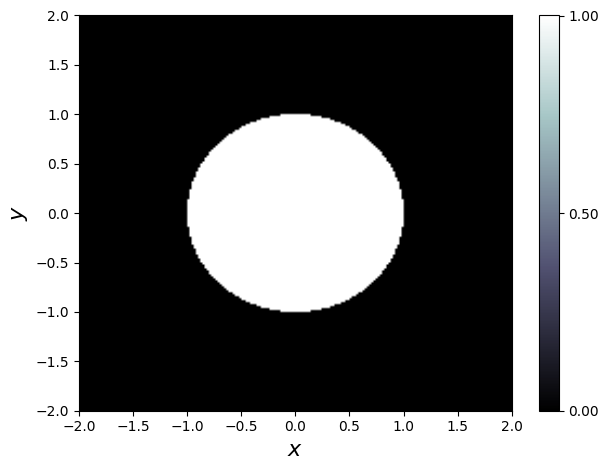

<Figure size 640x480 with 0 Axes>

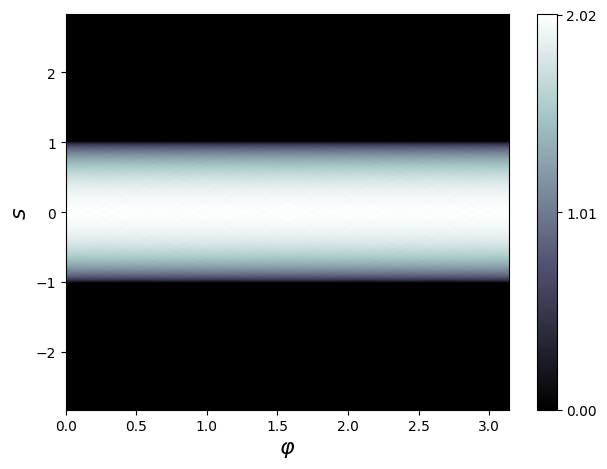

<Figure size 640x480 with 0 Axes>

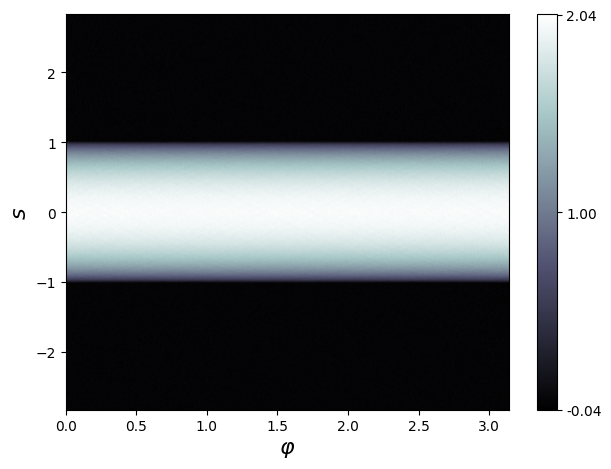

<Figure size 640x480 with 0 Axes>

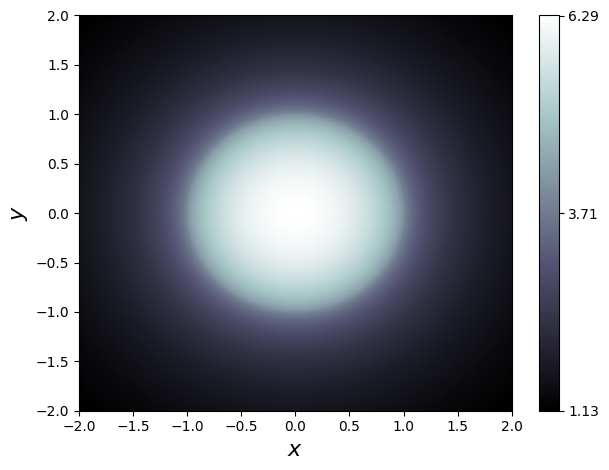

<Figure size 640x480 with 0 Axes>

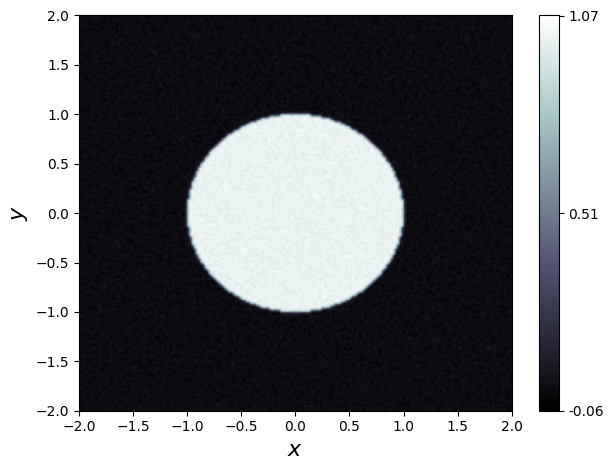

<Figure size 640x480 with 0 Axes>

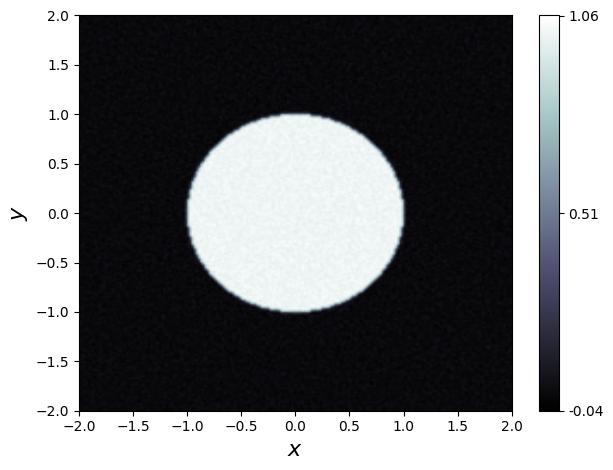

<Figure size 640x480 with 0 Axes>

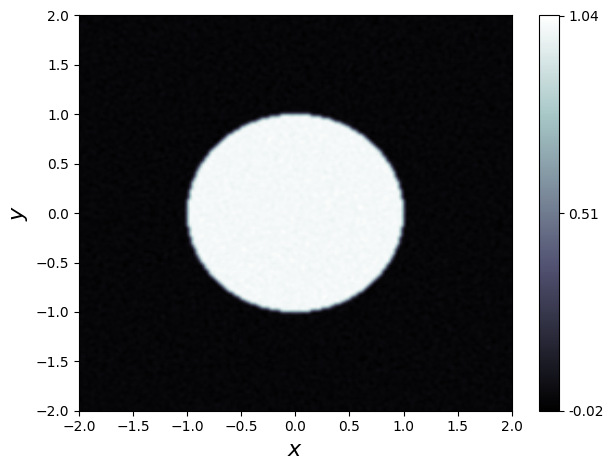

<Figure size 640x480 with 0 Axes>

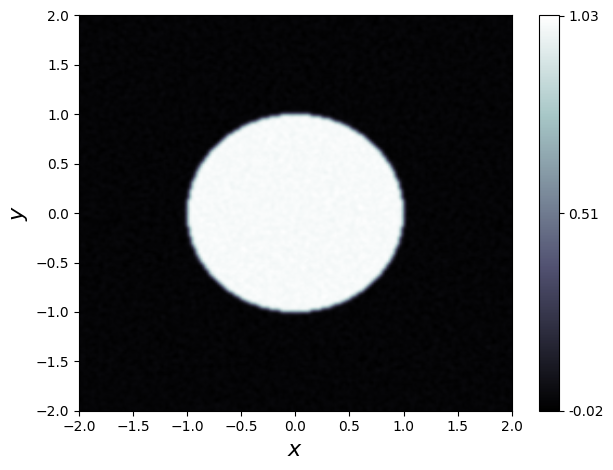

<Figure size 640x480 with 0 Axes>

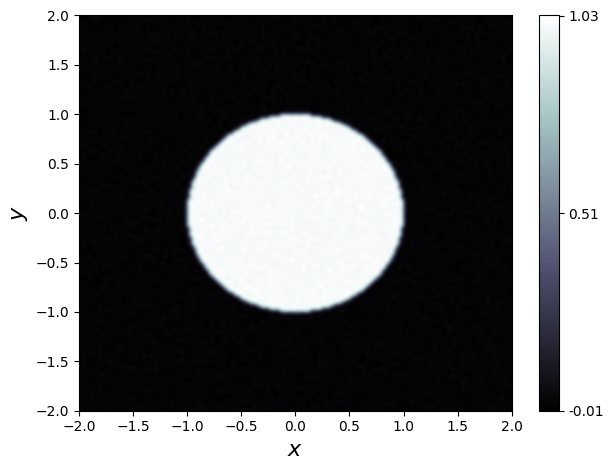

<Figure size 640x480 with 0 Axes>

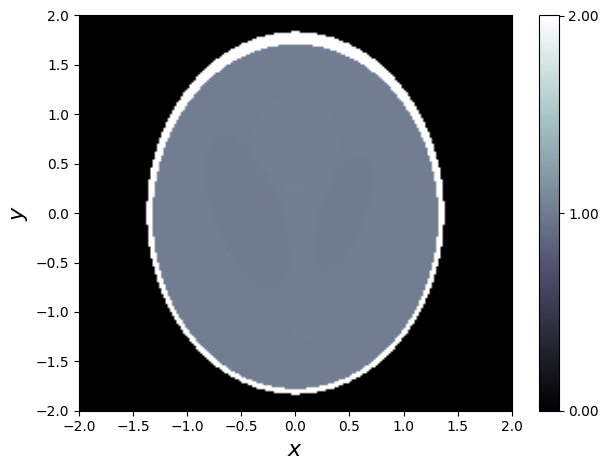

<Figure size 640x480 with 0 Axes>

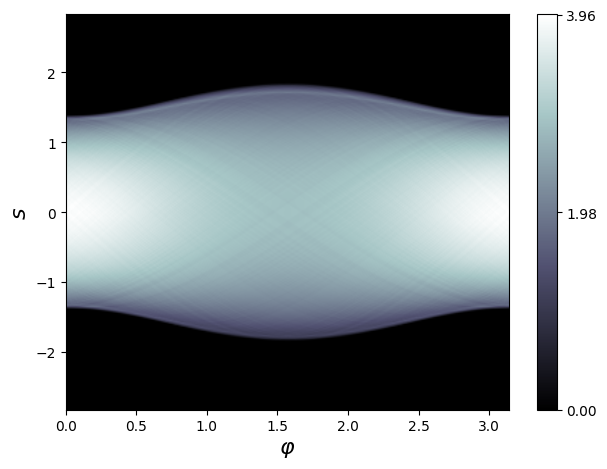

<Figure size 640x480 with 0 Axes>

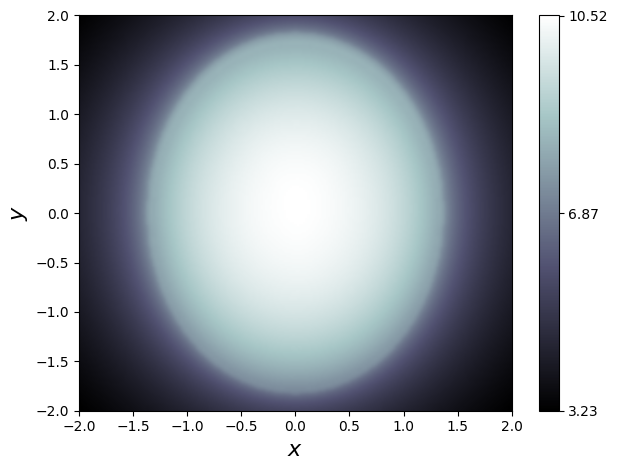

<Figure size 640x480 with 0 Axes>

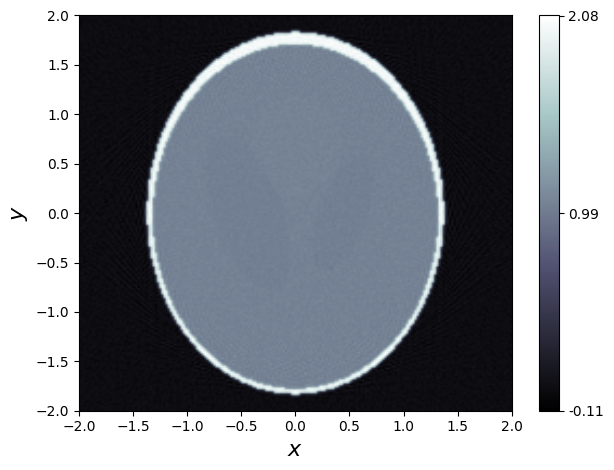

<Figure size 640x480 with 0 Axes>

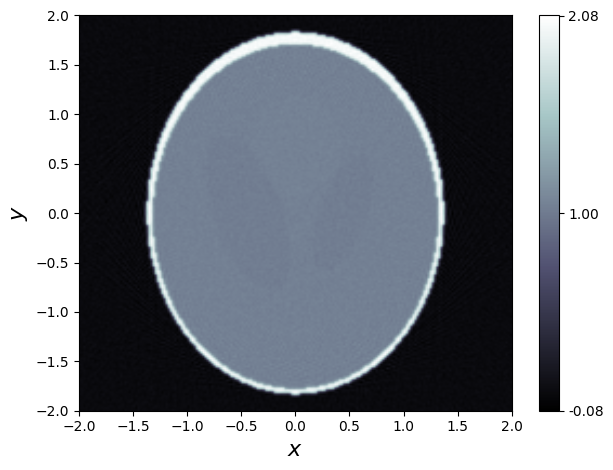

<Figure size 640x480 with 0 Axes>

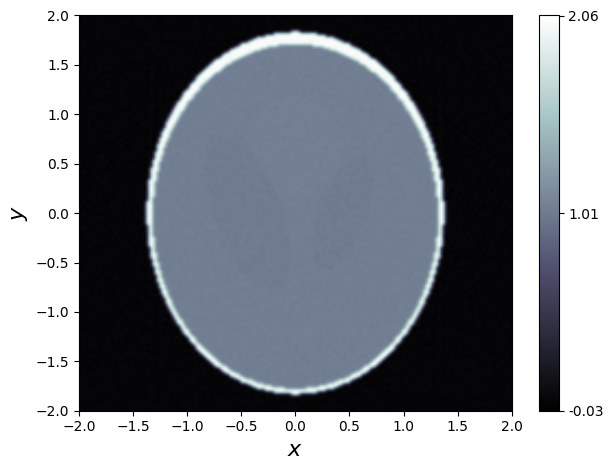

<Figure size 640x480 with 0 Axes>

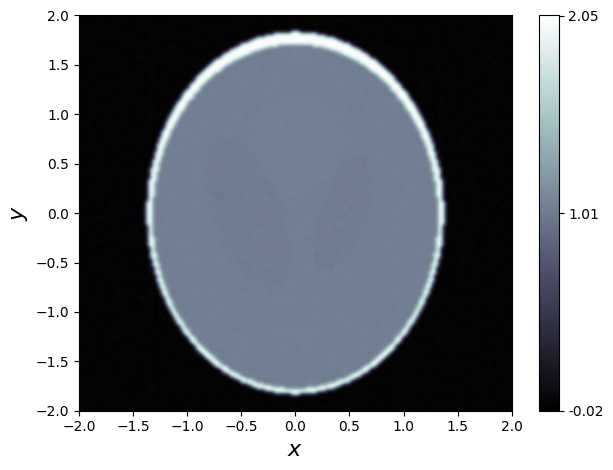

<Figure size 640x480 with 0 Axes>

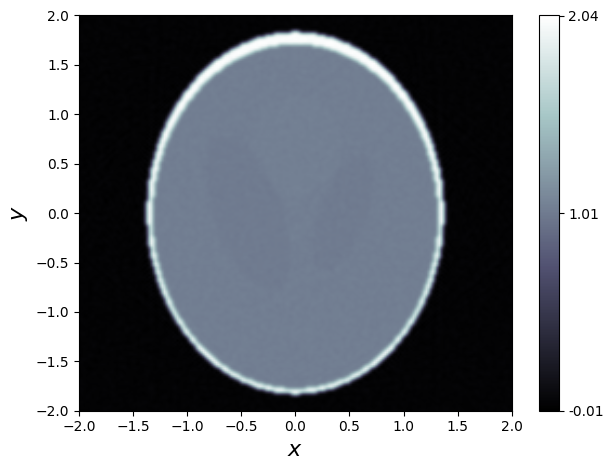

<Figure size 640x480 with 0 Axes>

All done!!!!


In [14]:
import odl
import numpy as np
import matplotlib.pyplot as plt

space = odl.uniform_discr([-2,-2],[2,2],200)

indicator =  space.element(lambda x: x[0]**2+x[1]**2 <=1)
indicator.show()

geo = odl.tomo.geometry.parallel.parallel_beam_geometry(space)

A = odl.tomo.operators.ray_trafo.RayTransform(space, geo, impl='astra_cuda')

Q = A(indicator)

Q.show()

Q_noisy = Q + odl.phantom.noise.white_noise(A.range, stddev=0.01)
Q_noisy.show()

body = A.adjoint(Q_noisy)
body.show()

A1 = odl.tomo.analytic.filtered_back_projection.fbp_op(A, filter_type="Ram-Lak")
A1(Q_noisy).show()

A2 = odl.tomo.analytic.filtered_back_projection.fbp_op(A, filter_type="Shepp-Logan")
A2(Q_noisy).show()

A3 = odl.tomo.analytic.filtered_back_projection.fbp_op(A, filter_type="Cosine")
A3(Q_noisy).show()

A4 = odl.tomo.analytic.filtered_back_projection.fbp_op(A, filter_type="Hamming")
A4(Q_noisy).show()

A5 = odl.tomo.analytic.filtered_back_projection.fbp_op(A, filter_type="Hann")
A5(Q_noisy).show()

phant = odl.phantom.transmission.shepp_logan(space)

phant.show()

Q2  = A(phant)
Q2.show()

Q2_noisy = Q2 + odl.phantom.noise.white_noise(A.range, stddev=0.01)

A.adjoint(Q2_noisy).show()
A1(Q2_noisy).show()
A2(Q2_noisy).show()
A3(Q2_noisy).show()
A4(Q2_noisy).show()
A5(Q2_noisy).show()


print("All done!!!!")